### **Analysis of Transaction Data**

In [41]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import nltk
import re

In [42]:
# Read data from files
data_t = pd.read_excel('QVI_transaction_data.xlsx')


In [43]:
data_t.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [44]:
# dimensions of the datasets
data_t.shape

(264836, 8)

In [45]:
# change the date datatype to display the correct format of dates
def convertdate(x):
 serial = x
 seconds = (serial - 25569) * 86400.0
 return datetime.datetime.utcfromtimestamp(seconds)

data_t['DATE'] = data_t['DATE'].apply(lambda x:convertdate(x))

data_t.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [46]:
# datatypes in datasets
data_t.dtypes

,0
DATE,datetime64[ns]
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


In [47]:
# Check for null values
data_t.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [48]:
# Check for number of unique values
data_t.nunique()

,0
DATE,364
STORE_NBR,272
LYLTY_CARD_NBR,72637
TXN_ID,263127
PROD_NBR,114
PROD_NAME,114
PROD_QTY,6
TOT_SALES,112


In [49]:
df = pd.DataFrame({'DATE':pd.date_range('2018-07-01', '2019-06-30')})
df.head()

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05


In [50]:
# Create a new dataframe which contains the total sale for each date

a = pd.pivot_table(data_t, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
a.head()


,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [51]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
len(b)

365

In [52]:
c = a + b
c.fillna(0, inplace = True)
c.head()


,TOT_SALES
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [53]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
c.head()

,Total Sales
Date,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


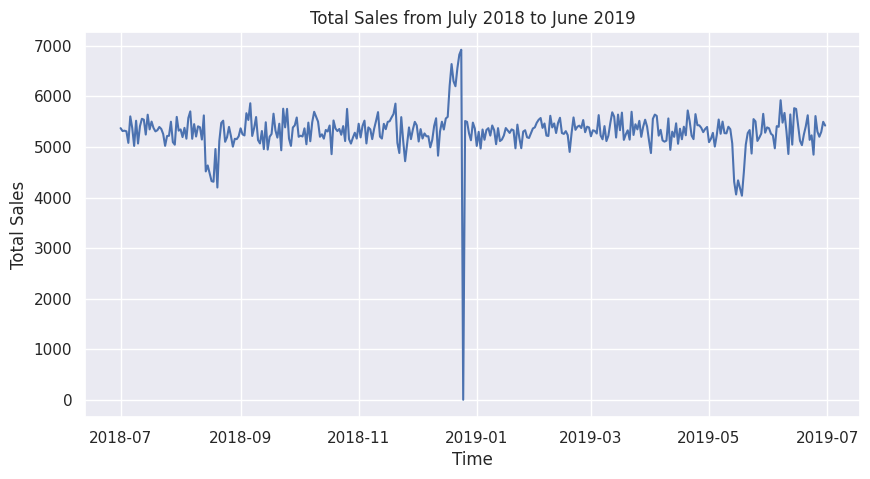

In [54]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
timeline = c.index
graph = c['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

In [55]:
# Let's look at the November month only
c_november = c[(c.index < "2018-12-01") & (c.index > "2018-10-01")]
c_november.head()

,Total Sales
Date,
2018-10-02,5223.5
2018-10-03,5207.0
2018-10-04,5368.5
2018-10-05,5053.6
2018-10-06,5481.7


Text(0.5, 1.0, 'Total Sales in November')

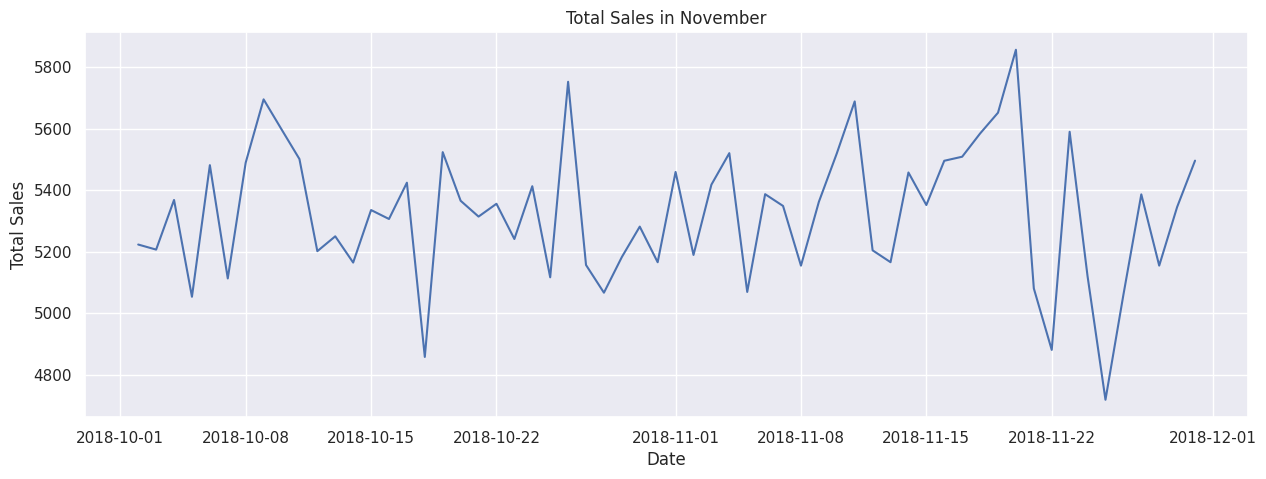

In [56]:
plt.figure(figsize = (15, 5))
plt.plot(c_november)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in November')


In [57]:
# Create pack size column
search = []
for values in data_t['PROD_NAME']:
    search.append(re.search(r'\d+', values).group())

data_t['Pack-size'] = search
data_t['Pack-size'] = pd.to_numeric(data_t['Pack-size'])

data_t.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [58]:
# Check for the minimum and maximum packet sizes
print('Minimum pack size:' + str(data_t['Pack-size'].min())), print('Maximum pack size:' + str(data_t['Pack-size'].max()))


Minimum pack size:70
Maximum pack size:380


(None, None)

Text(0.5, 1.0, 'Transactions based on Pack-size')

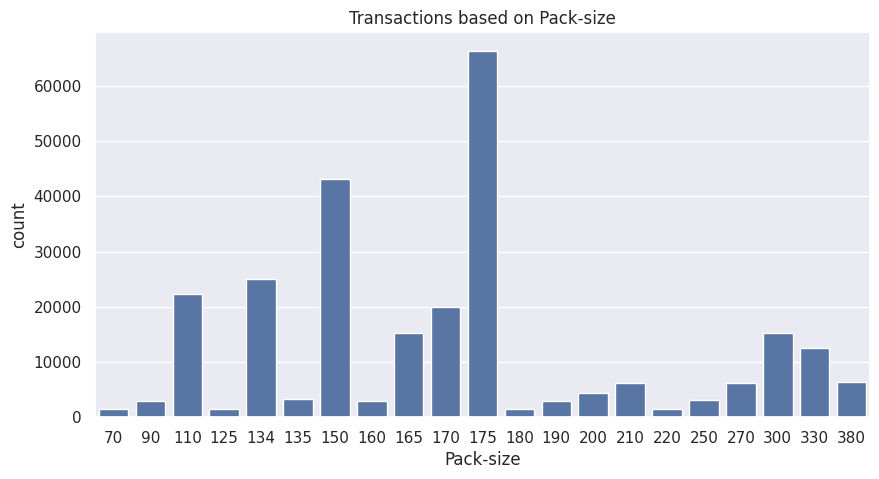

In [59]:
# Plot transactions based on Pack-size
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x="Pack-size", data=data_t)
plt.title('Transactions based on Pack-size')